### Importing library

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import *

### Loading Users.txt file

In [2]:
user_data=[]
with open('F:\\my_uwt\\tri3\\LFM-1b\\LFM-1b_users.txt','rt') as f:
    for l in f:
        line= l.split('\t')
        line[-1]=line[-1].replace('\n','')
        user_data.append(line)

### Creating User DataFrame

In [3]:
user_data_frame = pd.DataFrame(user_data,columns=user_data[0])
user_data_frame = user_data_frame[1:]

In [4]:
user_data_frame.columns = ['user-id', 'country', 'age', 'gender', 'playcount',
       'registered_unixtime']

In [5]:
user_data_frame=user_data_frame.fillna(np.nan)

### Creating country dataframe from User Dataframe 

In [6]:
user_country = pd.DataFrame(user_data_frame['country'].value_counts())
user_country_total = int(pd.to_numeric(user_country.iloc[0:1,0]))
user_country= user_country[1:]

### Creating subset of country dataframe with only songs with more than 1000 listeners

In [7]:
top_user_country=user_country[user_country['country']>1000]

### Graph for top countries with more than 1000 users

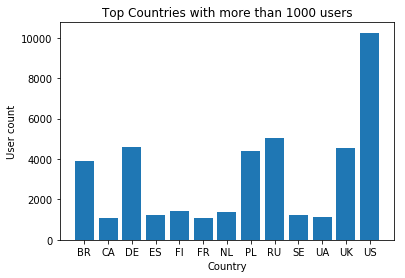

In [11]:
plt.bar(top_user_country.index,top_user_country['country'])
plt.xlabel('Country')
plt.ylabel('User count')
plt.title('Top Countries with more than 1000 users')
plt.show()

In [12]:
top_user_country['Percentage of Total'] = (top_user_country['country']/user_country_total)*100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Top country dataframe with percentage of total

In [13]:
top_user_country

,country,Percentage of Total
US,10255,15.744949
RU,5024,7.713566
DE,4578,7.028803
UK,4534,6.961248
PL,4408,6.767795
BR,3886,5.966345
FI,1409,2.163299
NL,1375,2.111097
ES,1243,1.908432
SE,1231,1.890008


In [14]:
user_data_frame=user_data_frame[ (user_data_frame['gender']!='n') & (user_data_frame['gender']!='')]
gender_mapping = {'m':'Male','f':'Female'}
user_data_frame['gender']=user_data_frame['gender'].map(gender_mapping)

### Gender distribution across the dataset

In [15]:
user_data_frame['gender'].value_counts()

Male      39969
Female    15802
Name: gender, dtype: int64

In [16]:
user_data_frame['age'] =pd.to_numeric(user_data_frame['age'])

### Removing the outliers from Age column

In [18]:
user_age = user_data_frame[(user_data_frame['age']!=-1)&(user_data_frame['age']<110)]

### Age distribution across the dataset

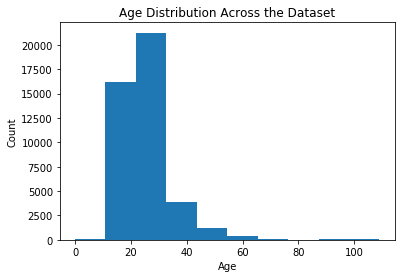

In [21]:
plt.hist(user_age['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution Across the Dataset')
plt.show()

### Loading the User_additional.txt

In [22]:
user_add_data=[]
with open('F:\\my_uwt\\tri3\\LFM-1b\\LFM-1b_users_additional.txt','rt') as f:
    for l in f:
        line= l.split('\t')
        line[-1]=line[-1].replace('\n','')
        user_add_data.append(line)

In [23]:
user_add_dataframe = pd.DataFrame(user_add_data,columns=user_add_data[0])
user_add_dataframe = user_add_dataframe[1:]

### Subset dataframe from User_additional dataframe

In [24]:
user_add_1 = user_add_dataframe.loc[:,['user-id','novelty_artist_avg_year']]

In [25]:
user_nov_bins = [0,0.2,0.4,0.6,0.8,1]
user_nov_label = [0.2,0.4,0.6,0.8,1]
user_add_1 =user_add_1[user_add_1['novelty_artist_avg_year']!='?']
user_add_1['novelty_artist_avg_year']=user_add_1['novelty_artist_avg_year'].map(float)
user_add_1['binned']= pd.cut(user_add_1['novelty_artist_avg_year'],bins=user_nov_bins,labels=user_nov_label)

### Count of users across binned data, for Novely_Artist_Avg_year

In [26]:
user_add_1['binned'].value_counts()

0.6    40019
0.4    29194
0.8    25495
1.0    10474
0.2     6480
Name: binned, dtype: int64

### Merging certain columns of user_text dataframe and user_additional dataframe

In [27]:
user1 = user_data_frame.loc[:,['user-id','playcount']]
user2 = user_add_dataframe.loc[:,['user-id','cnt_listeningevents','cnt_distinct_tracks','cnt_distinct_artists','cnt_listeningevents_per_week']]

In [28]:
user_combined = pd.merge(left=user2,right=user1,left_on='user-id',right_on='user-id')

In [29]:
user_combined.head()

,user-id,cnt_listeningevents,cnt_distinct_tracks,cnt_distinct_artists,cnt_listeningevents_per_week,playcount
0,384,17198,3601,330,196.229,42139
1,3653,18238,9839,2151,41.8051,18504
2,4813,868,775,264,2.1297,640
3,5069,17732,9259,2213,65.1202,31867
4,6958,19862,6126,2152,110.743,34788


In [30]:
user_combined['cnt_listeningevents']=user_combined['cnt_listeningevents'].map(int)
user_combined['cnt_distinct_tracks']=user_combined['cnt_distinct_tracks'].map(int)
user_combined['cnt_distinct_artists']=user_combined['cnt_distinct_artists'].map(int)
user_combined['cnt_listeningevents_per_week']=user_combined['cnt_listeningevents_per_week'].map(float)
user_combined['playcount']=user_combined['playcount'].map(int)

### Description of the dataframe for columns with mean, std, count

In [32]:
user_combined.describe()

,cnt_listeningevents,cnt_distinct_tracks,cnt_distinct_artists,cnt_listeningevents_per_week,playcount
count,55771.000000,55771.000000,55771.000000,55771.000000,5.577100e+04
mean,14327.653171,3890.220724,696.792509,123.479663,2.870625e+04
std,20290.055846,4264.254334,799.432216,228.915432,4.338270e+04
min,1.000000,1.000000,1.000000,0.000000,-1.000000e+00
25%,3029.000000,1136.000000,219.000000,29.773950,1.652000e+03
50%,12861.000000,2883.000000,460.000000,77.288500,1.416100e+04
75%,19595.000000,5350.500000,894.000000,152.829500,3.932750e+04
max,612822.000000,156805.000000,34987.000000,21060.200000,1.000150e+06


### Plot which shows relationship between Total Listening Events and Avg Listening event per week

In [45]:
#From below chart it is evident that there are some users who have less total listening events 
#but their avg_listening per week is very high. For listening event as 1 it is also seen that avg listening per week is 0, 
#which shows that no songs were played

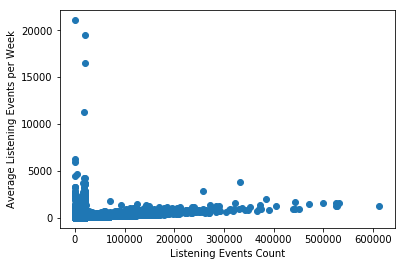

In [41]:
plt.scatter(user_combined['cnt_listeningevents'],user_combined['cnt_listeningevents_per_week'])
plt.xlabel('Listening Events Count')
plt.ylabel('Average Listening Events per Week')
plt.show()

### Plot to show relationship between listening evnets and distinct tracks

In [48]:
#From the plot it is evident that there is a linear relationship between the two

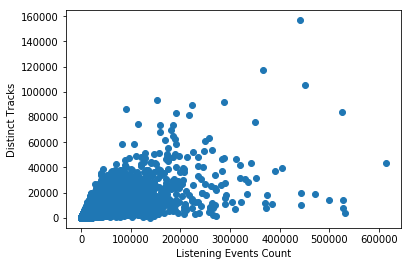

In [49]:
plt.scatter(user_combined['cnt_listeningevents'],user_combined['cnt_distinct_tracks'])
plt.xlabel('Listening Events Count')
plt.ylabel('Distinct Tracks')
plt.show()

### Plot between Playcount and Distinct tracks

In [53]:
#From the plot it is evident that the is a linear relationship between the two. 
#However, there are certain observations-for certain high values of listening events the value of distinct tracks
#is extremely low which shows that same songs were played over and over again
#For certain values of mid values of listening event it is evident that there were many distinct tracks were listened which 
#could either be because of seraching for a particular similar song  or the user is avid user

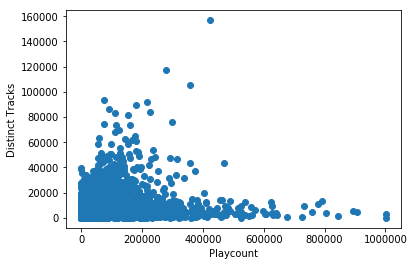

In [59]:
plt.scatter(user_combined['playcount'],user_combined['cnt_distinct_tracks'])
plt.xlabel('Playcount')
plt.ylabel('Distinct Tracks')
plt.show()

### Loading the music lyrics dataset (obtained from kaggle)

In [65]:
lyrics_df = pd.read_csv('F:\\my_uwt\\tri3\\LFM-1b\\songdata.csv')

In [83]:
song_title = lyrics_df['song']
song_title = song_title.tolist()

### Loading th tracks.txt obtained from LFM-1b dataset

In [99]:
tracks_df = pd.read_csv('f:\\my_uwt\\tri3\\LFM-1b\\tracks.csv')

In [110]:
dataset=pd.read_csv('F:\\my_uwt\\tri3\\LFM-1b\\songdata.csv')

In [111]:
train_data = dataset[:]
train_data = np.array(train_data['text'])

In [128]:
### Since the Music Lyrics is unlabelled dataset i.e. the songs have lyrics but not sentiment, 
#so to calculate the sentiment, we user NRC Sentiment Analyser and create labelled data

In [112]:
stemmer = PorterStemmer()
dataset['Splitted']=dataset['text'].apply(lambda x: [y for y in x.split(" ")])
dataset['Stemmed']=dataset['Splitted'].apply(lambda x : [stemmer.stem(y) for y in x])
dataset['OnlyAlpha']=dataset['Stemmed'].apply(lambda x: [y for y in x if y.isalpha()])
filtered_words = stopwords.words('english')
dataset['Lyrics']=dataset['OnlyAlpha'].apply(lambda x: [y for y in x if y not in filtered_words])
dataset=dataset.drop(['Splitted','Stemmed','OnlyAlpha'],axis=1)

In [113]:
senti_try={}
with open('NRC_emotion_lexicon_list.txt','r') as f:
    for lines in f:
        lines=lines.replace("\n","")
        line = lines.split("\t")
        if ((line[2]=='1') and (line[1]=='negative')):
            senti_try.update({line[0]:'Negative'})
        elif ((line[1]=='positive') and (line[2]=='1')):
            senti_try.update({line[0]:'Positive'})
result=[]
for i,j in dataset.iterrows():
    pos=0
    neg=0
    l=j[4]
    for k in l:
        #print(k)
        if ((k in senti_try)):
            if (senti_try[k]=='Negative'):
                neg=neg+1
            else:
                pos=pos+1
    if pos>neg:
        result.append('Positive')
    else:
        result.append('Negative')
#dataset['NRC_sentiment']=result
dataset['sentiment']=result

In [115]:
lyrics_df1 = pd.merge(left=lyrics_df,right=dataset,left_on='song',right_on='song')

In [116]:
tracks_lyrics = pd.merge(left= lyrics_df1,right=tracks_df,left_on='song',right_on='track-name')

In [129]:
# dropping duplicate values

In [118]:
tracks_lyrics =tracks_lyrics.drop(['link_x','artist_y','link_y','text_y','Lyrics'],axis=1)

In [124]:
track_lyrics1 = tracks_lyrics[['track-name','text_x','sentiment']]

In [125]:
track_lyrics1 = track_lyrics1.drop_duplicates(['track-name','text_x'])

In [130]:
## below table shows the number of Positive and Negative Sentiment Songs.

In [136]:
track_lyrics1['sentiment'].value_counts()

Positive    32464
Negative    20534
Name: sentiment, dtype: int64